In [4]:
import requests

In [5]:
req = requests.get("https://en.wikipedia.org/wiki/Harvard_University")

This is to get the content in that wiki page of harvard

In [6]:
type(req)

requests.models.Response

In [7]:
dir(req)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

It will give the properties of the req object here

Now it is not just about the object, we need to get the text from the req

In [8]:
page = req.text

In [9]:
page

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Harvard University - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Harvard_University","wgTitle":"Harvard University","wgCurRevisionId":905809502,"wgRevisionId":905809502,"wgArticleId":18426501,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from March 2018","All articles containing potentially dated statements","CS1: Julian–Gregorian uncertainty","Webarchive template wayback links","Wikipedia indefinitely move-protected pages","Articles with short description","Use American English from February 2019","All Wikipedia articles written in American English","Use mdy dates fr

The data we get in the text format is also with html tags which is very clumsy so we use a python library called **beautiful soup** which helps us to understand the content easily

In [10]:
from bs4 import BeautifulSoup

In [11]:
soup = BeautifulSoup(page, 'html.parser')

In [12]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Harvard University - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Harvard_University","wgTitle":"Harvard University","wgCurRevisionId":905809502,"wgRevisionId":905809502,"wgArticleId":18426501,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from March 2018","All articles containing potentially dated statements","CS1: Julian–Gregorian uncertainty","Webarchive template wayback links","Wikipedia indefinitely move-protected pages","Articles with short description","Use American English from February 2019","All Wikipedia articles written in American English","Use mdy dates from July

In [13]:
soup.title

<title>Harvard University - Wikipedia</title>

In [14]:
soup.table["class"]

['infobox', 'vcard']

List comprehensions to get things easier. we are adding the attributes with class.

In [15]:
[t["class"] for t in soup.find_all("table") if t.get("class")]

[['infobox', 'vcard'],
 ['toccolours'],
 ['box-Expand_section',
  'plainlinks',
  'metadata',
  'ambox',
  'mbox-small-left',
  'ambox-content'],
 ['infobox'],
 ['wikitable', 'sortable', 'collapsible', 'collapsed', 'floatright'],
 ['wikitable', 'sortable', 'collapsible', 'collapsed', 'floatright'],
 ['wikitable'],
 ['box-Cleanup-gallery', 'plainlinks', 'metadata', 'ambox', 'ambox-style'],
 ['nowraplinks', 'collapsible', 'collapsed', 'navbox-inner'],
 ['nowraplinks', 'navbox-subgroup'],
 ['nowraplinks', 'navbox-subgroup'],
 ['nowraplinks', 'collapsible', 'collapsed', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'collapsed', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'collapsible', 'autocollapse', 'navbox-inner'],
 ['nowraplinks', 'colla

In [16]:
table_html = str(soup.find_all("table", "wikitable")[2])

In [17]:
from IPython.core.display import HTML

HTML(table_html)

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17%,11%,5%
Black/non-Hispanic,6%,4%,12%
Hispanics of any race,9%,5%,16%
White/non-Hispanic,46%,43%,64%
Mixed race/other,10%,8%,9%
International students,11%,27%,N/A


Find will give only one output but the find all will give all the elements corresonding function

In [18]:
rows = [row for row in soup.find_all("table", "wikitable")[2].find_all("tr")]
rows

[<tr>
 <th></th>
 <th>Undergrad</th>
 <th>Graduate</th>
 <th>U.S. census
 </th></tr>, <tr>
 <th>Asian/Pacific Islander
 </th>
 <td>17%</td>
 <td>11%</td>
 <td>5%
 </td></tr>, <tr>
 <th>Black/non-Hispanic
 </th>
 <td>6%</td>
 <td>4%</td>
 <td>12%
 </td></tr>, <tr>
 <th>Hispanics of any race
 </th>
 <td>9%</td>
 <td>5%</td>
 <td>16%
 </td></tr>, <tr>
 <th>White/non-Hispanic
 </th>
 <td>46%</td>
 <td>43%</td>
 <td>64%
 </td></tr>, <tr>
 <th>Mixed race/other
 </th>
 <td>10%</td>
 <td>8%</td>
 <td>9%
 </td></tr>, <tr>
 <th>International students
 </th>
 <td>11%</td>
 <td>27%</td>
 <td>N/A
 </td></tr>]

In [19]:
# Lambda expressions return the value of the expression inside it.
# In this case, it will return a string with new line characters replaced by spaces.
rem_nl = lambda s: s.replace("\n", "")

**Splitting data**

below columns is to get the coulmn names

In [20]:
columns = [rem_nl(col.get_text()) for col in rows[0].find_all("th") if col.get_text()]
columns

['Undergrad', 'Graduate', 'U.S. census']

In [21]:
indexes = [rem_nl(row.find("th").get_text()) for row in rows[1:]]

indexes

['Asian/Pacific Islander',
 'Black/non-Hispanic',
 'Hispanics of any race',
 'White/non-Hispanic',
 'Mixed race/other',
 'International students']

In [22]:
to_num = lambda s: s[-1] =="%" and int(s[:-1]) or None 

In [23]:
values = [to_num(rem_nl(value.get_text())) for row in rows[1:] for value in row.find_all("td")]
values

[17, 11, 5, 6, 4, 12, 9, 5, 16, 46, 43, 64, 10, 8, 9, 11, 27, None]

In [24]:
stacked_values = zip(*[values[i::3] for i in range(len(columns))])
list(stacked_values)

[(17, 11, 5), (6, 4, 12), (9, 5, 16), (46, 43, 64), (10, 8, 9), (11, 27, None)]

In [25]:
import pandas as pd

Now we are getting started with pandas.

In [26]:
stacked_values = zip(*[values[i::3] for i in range(len(columns))])
df = pd.DataFrame(stacked_values, columns=columns, index=indexes)
df

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17,11,5.0
Black/non-Hispanic,6,4,12.0
Hispanics of any race,9,5,16.0
White/non-Hispanic,46,43,64.0
Mixed race/other,10,8,9.0
International students,11,27,NaN


In [27]:
columns = [rem_nl(col.get_text()) for col in rows[0].find_all("th") if col.get_text()] 
stacked_values = zip(*[values[i::3] for i in range(len(columns))])
data_dicts = [{col: val for col, val in zip(columns,col_values)} for col_values in stacked_values]
data_dicts


[{'Undergrad': 17, 'Graduate': 11, 'U.S. census': 5},
 {'Undergrad': 6, 'Graduate': 4, 'U.S. census': 12},
 {'Undergrad': 9, 'Graduate': 5, 'U.S. census': 16},
 {'Undergrad': 46, 'Graduate': 43, 'U.S. census': 64},
 {'Undergrad': 10, 'Graduate': 8, 'U.S. census': 9},
 {'Undergrad': 11, 'Graduate': 27, 'U.S. census': None}]

In [28]:
df.dtypes

Undergrad        int64
Graduate         int64
U.S. census    float64
dtype: object

to drop a na value row

In [29]:
df.dropna()

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17,11,5.0
Black/non-Hispanic,6,4,12.0
Hispanics of any race,9,5,16.0
White/non-Hispanic,46,43,64.0
Mixed race/other,10,8,9.0


Keep  the na values as zero

In [30]:
dfnew = df.fillna(0).astype(int)
dfnew

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17,11,5
Black/non-Hispanic,6,4,12
Hispanics of any race,9,5,16
White/non-Hispanic,46,43,64
Mixed race/other,10,8,9
International students,11,27,0


In [31]:
dfnew.describe()

,Undergrad,Graduate,U.S. census
count,6.000000,6.000000,6.000000
mean,16.500000,16.333333,17.666667
std,14.896308,15.513435,23.363790
min,6.000000,4.000000,0.000000
25%,9.250000,5.750000,6.000000
50%,10.500000,9.500000,10.500000
75%,15.500000,23.000000,15.000000
max,46.000000,43.000000,64.000000


In [32]:
import numpy as np

In [33]:
dfnew.values

array([[17, 11,  5],
       [ 6,  4, 12],
       [ 9,  5, 16],
       [46, 43, 64],
       [10,  8,  9],
       [11, 27,  0]])

In [34]:
type(dfnew.values)

numpy.ndarray

In [35]:
np.mean(dfnew.Undergrad)

16.5

In [36]:
np.std(dfnew)

Undergrad      13.598407
Graduate       14.161764
U.S. census    21.328124
dtype: float64

In [37]:
dfnew['Undergrad']

Asian/Pacific Islander    17
Black/non-Hispanic         6
Hispanics of any race      9
White/non-Hispanic        46
Mixed race/other          10
International students    11
Name: Undergrad, dtype: int32

In [38]:
dfnew.loc["Asian/Pacific Islander"]

Undergrad      17
Graduate       11
U.S. census     5
Name: Asian/Pacific Islander, dtype: int32

In [39]:
dfnew.loc["Asian/Pacific Islander","Graduate"]

11

**Split and combine**

In [40]:
seq_table = dfnew.stack().reset_index()
seq_table.columns = ["race", "source", "percentage"]
seq_table

,race,source,percentage
0,Asian/Pacific Islander,Undergrad,17
1,Asian/Pacific Islander,Graduate,11
2,Asian/Pacific Islander,U.S. census,5
3,Black/non-Hispanic,Undergrad,6
4,Black/non-Hispanic,Graduate,4
5,Black/non-Hispanic,U.S. census,12
6,Hispanics of any race,Undergrad,9
7,Hispanics of any race,Graduate,5
8,Hispanics of any race,U.S. census,16
9,White/non-Hispanic,Undergrad,46


In [41]:
grouped_data = seq_table.groupby("race")
grouped_data.groups

{'Asian/Pacific Islander': Int64Index([0, 1, 2], dtype='int64'),
 'Black/non-Hispanic': Int64Index([3, 4, 5], dtype='int64'),
 'Hispanics of any race': Int64Index([6, 7, 8], dtype='int64'),
 'International students': Int64Index([15, 16, 17], dtype='int64'),
 'Mixed race/other': Int64Index([12, 13, 14], dtype='int64'),
 'White/non-Hispanic': Int64Index([9, 10, 11], dtype='int64')}

In [42]:
type(grouped_data)

pandas.core.groupby.generic.DataFrameGroupBy

In [43]:
mean_table = grouped_data.mean()
mean_table

,percentage
race,
Asian/Pacific Islander,11.000000
Black/non-Hispanic,7.333333
Hispanics of any race,10.000000
International students,12.666667
Mixed race/other,9.000000
White/non-Hispanic,51.000000


In [44]:
for name, group in seq_table.groupby("source", sort=True):
  print(name)
  print(group)

Graduate
                      race    source  percentage
1   Asian/Pacific Islander  Graduate          11
4       Black/non-Hispanic  Graduate           4
7    Hispanics of any race  Graduate           5
10      White/non-Hispanic  Graduate          43
13        Mixed race/other  Graduate           8
16  International students  Graduate          27
U.S. census
                      race       source  percentage
2   Asian/Pacific Islander  U.S. census           5
5       Black/non-Hispanic  U.S. census          12
8    Hispanics of any race  U.S. census          16
11      White/non-Hispanic  U.S. census          64
14        Mixed race/other  U.S. census           9
17  International students  U.S. census           0
Undergrad
                      race     source  percentage
0   Asian/Pacific Islander  Undergrad          17
3       Black/non-Hispanic  Undergrad           6
6    Hispanics of any race  Undergrad           9
9       White/non-Hispanic  Undergrad          46
12        Mi

In [45]:
%matplotlib inline

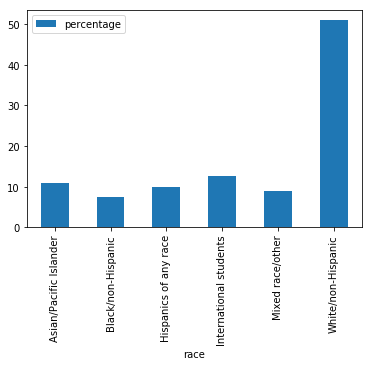

In [46]:
mean_table.plot(kind="bar")